<a href="https://www.kaggle.com/code/divyasreebillakanti/notebooka7ffcbccdd?scriptVersionId=128508931" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv")

print(data.head())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [3]:
print(data.describe())

         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [5]:
fig=px.line(data,x="date",y='meantemp',title="Mean Temperature in Delhi over the years")
fig.show()

In [6]:
fig=px.line(data,x="date",y="humidity",title="Humidity in Delhi over the Years")
fig.show()

In [7]:
fig=px.line(data,x="date",y="wind_speed",title="Wind Speed in Delhi Over the years")
fig.show()

In [8]:
fig=px.scatter(data_frame=data,x="humidity",y="meantemp",size="meantemp",trendline="ols",title="Relationships Between Temperature and Humidity")
fig.show()

In [9]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1


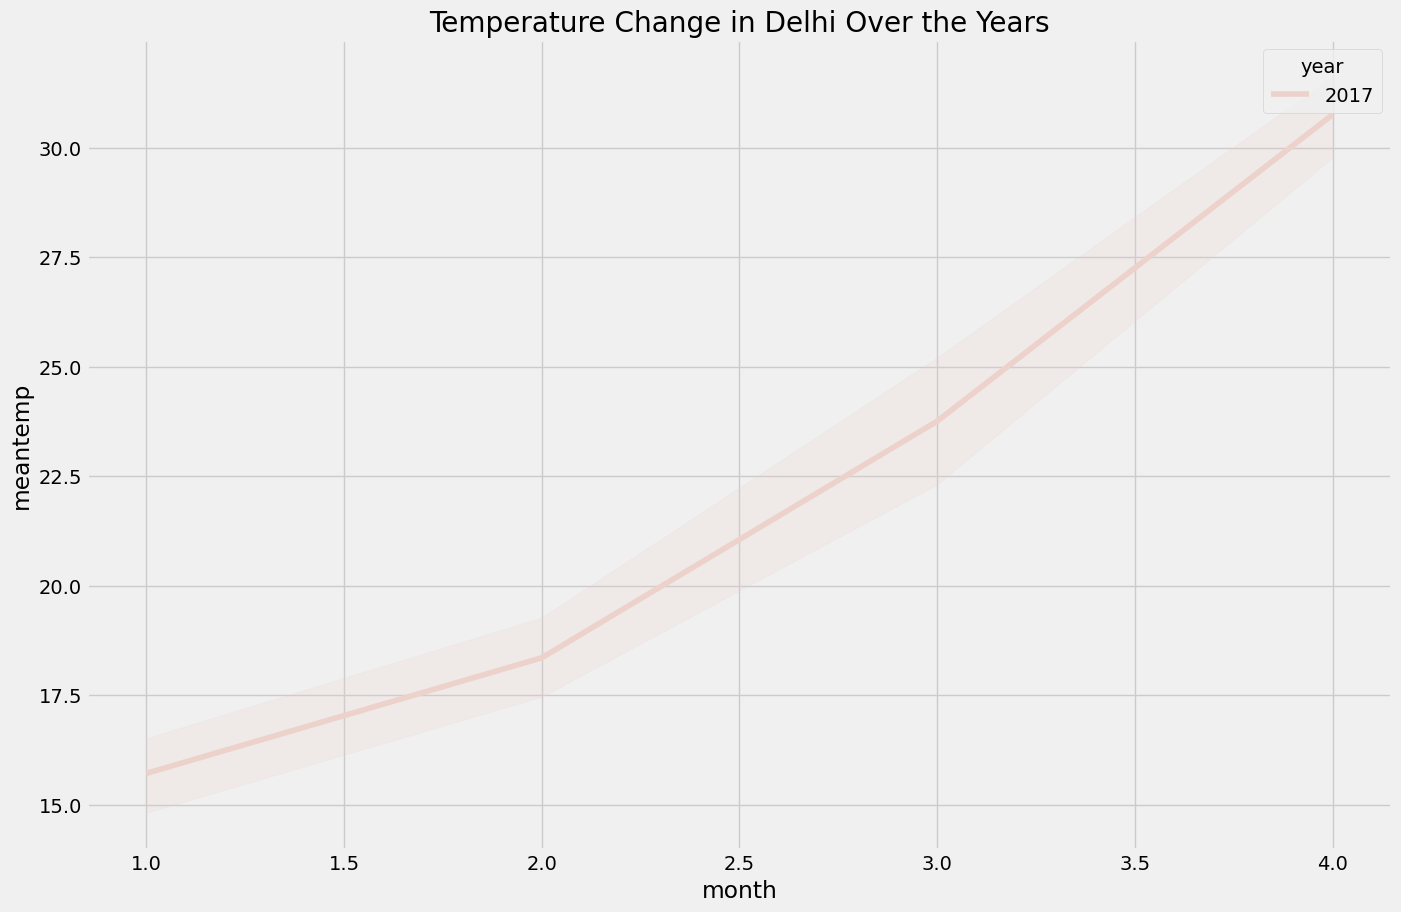

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [11]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

            ds          y   humidity  wind_speed  meanpressure  year  month
0   2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1   2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2   2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3   2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4   2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1
..         ...        ...        ...         ...           ...   ...    ...
109 2017-04-20  34.500000  27.500000    5.562500    998.625000  2017      4
110 2017-04-21  34.250000  39.375000    6.962500    999.875000  2017      4
111 2017-04-22  32.900000  40.900000    8.890000   1001.600000  2017      4
112 2017-04-23  32.875000  27.500000    9.962500   1002.125000  2017      4
113 2017-04-24  32.000000  27.142857   12.157143   1004.142857  2017      4

[114 rows x 7 columns]


In [12]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

08:46:31 - cmdstanpy - INFO - Chain [1] start processing
08:46:31 - cmdstanpy - INFO - Chain [1] done processing
